In [96]:
# For developing EOS sim
from cycler import cycler
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.signal import *
from scipy.interpolate import interp1d as interp
import sys;
sys.path.insert(0, "../../python/");
sys.path.insert(0, "../current_profiles/")
# Custom modules
import current_profiles as cp; # For reading in Claudio's data
import eosim as sim;
plot_colors = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', \
               '#DDCC77', '#CC6677', '#882255', '#AA4499'];

cy = cycler('color', plot_colors);

def makefig(x = 4, y = 3, xlab = '', ylab = '', title = '', fs = 12, ts = 12, label = ''):
    fig = plt.figure(figsize = (x, y), dpi = 200);
    ax  = fig.gca();
    ax.set_prop_cycle(cy)
    ax.set_xlabel(xlab, fontsize = fs);
    ax.set_ylabel(ylab, fontsize = fs);
    ax.set_title(title, fontsize = ts, fontweight = 'bold');
    ax.tick_params(labelsize = 'large');
    if not label == '':
        ax.text(x = 0.05, y = 0.95, s = label, fontsize = fs, fontweight = 'bold', transform = ax.transAxes)
    return fig, ax;
# Simulation parameters
tau   = np.linspace(-1000, 1000, 1000) * 1e-15;
probe = {'y0' : 800e-9, 'width' : 27e-9, 'a_laser' : 0};
ctype = 'ZnTe'
d     = 100e-6;
r     = 5e-3;
ind   = 3;

In [97]:
I, ti, zi, dzi, dti = cp.get_current(ind);
I = cp.smooth_I(I, double = False);

In [98]:
I_drive, I_wit      = cp.split_I(I, ti);
E_drive, ze, te     = cp.get_E(I_drive, ti, zi, r);
E_wit, ze, te       = cp.get_E(I_wit, ti, zi, r);
E_drive             = np.flip(E_drive, axis = 0);
E_wit               = np.flip(E_wit, axis = 0);
te                  = te - te[np.argmax(E_drive)];
E_sim               = (E_drive, E_wit, E_drive + E_wit)

In [99]:
gamma_sim, t_plot_sim = sim.sim(E_sim, te, tau, ctype, 100e-6, probe, \
        x = [r, r], y = [0, 0], plot = False, plot_input = True, \
        normed = True, verbose = False, plot_all = False);

In [100]:
# Ideal gaussians
t_off = 477e-15;
sigt  = 17e-15;
E0    = 404182128; # Max of E_drive from above
E_drive = E0 * np.exp(-te**2 / (2 * sigt**2));
E_wit   = (E0 / 3) * np.exp(- (te + t_off)**2 / (2 * sigt**2))
E_gauss = (E_drive, E_wit, E_drive + E_wit)

In [101]:
gamma_gauss, t_plot_gauss = sim.sim(E_gauss, te, tau, ctype, 100e-6, probe, \
        x = [r, r], y = [0, 0], plot = False, plot_input = True, \
        normed = True, verbose = False, plot_all = False);

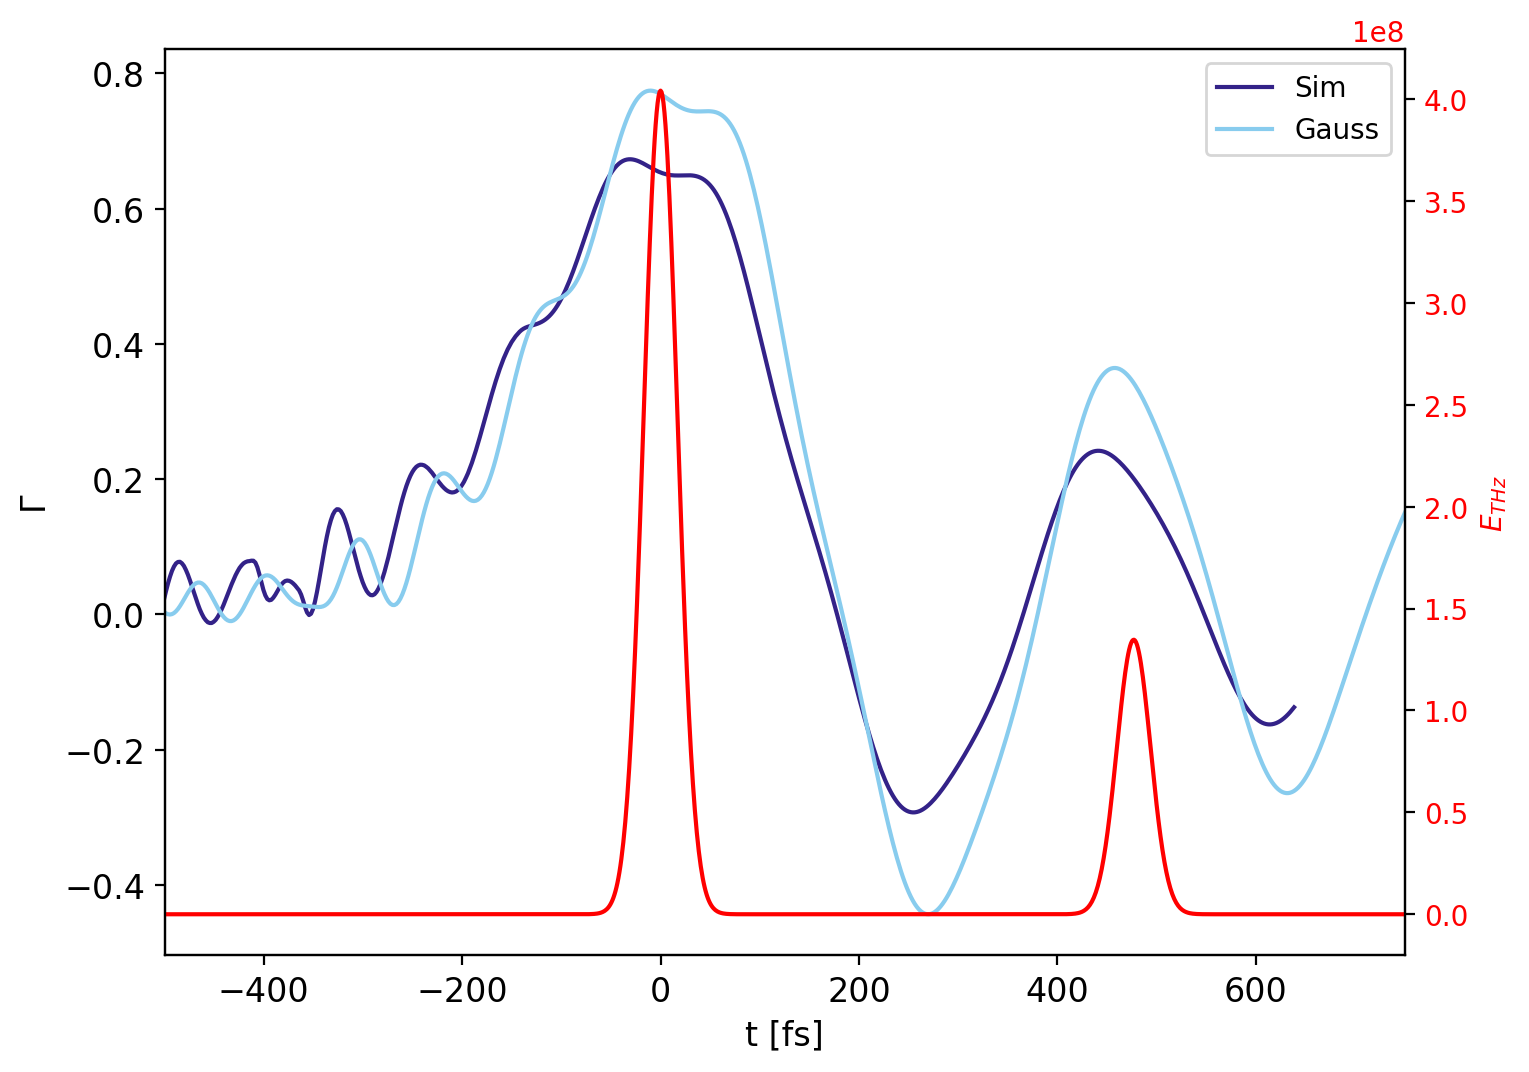

In [113]:
fig, ax = makefig(x = 8, y = 6, xlab = 't [fs]', ylab = r'$\Gamma$', label = '')
ax.plot(t_plot_sim, (gamma_sim[0]), label = 'Sim')
ax.plot(t_plot_gauss, (gamma_gauss[0]), label = 'Gauss')
ax2 = ax.twinx();
ax2.tick_params(axis = 'y', labelcolor = 'red');
ax2.set_ylabel(r'$E_{THz}$', color = 'r');
E_plot = np.flip(E_gauss[2], axis = 0);
te_plot = (te - te[np.argmax(E_plot)])*1e15
ax2.plot(te_plot, E_plot, '-r');
ax.set_xlim([-500, 750])
ax.legend(loc = 'upper right')
plt.show()